# MODELO DE VISUALIZACIÓN CON DASH 

## Objectives

El objetivo de este trabajo será realizar una predicción a cerca del **mejor sustituto del jugador de futbol que el usuario elija**,el jugador será elegido mediante el algoritmo KNN. Nos serviremos de la extensión de python Dash que is a Python framework for building analytical web applications para realizar la visualización como podría ser Shiny en R, Datawrapper, tableau..., en la misma, el usuario podrá elegir el jugador que el quiera y se muestrará a través de un gráfico de araña las características de los jugadores mas parecidos al elegido por el usuario. 
Nos basaremos en los datos proporcionados por Kaggle del juego 'FIFA 2019', que es un simulador de futbol conocido mundialmente, en el cual se encuentran todas las características de los jugadores
.
Our KPIs(A Key Performance Indicator (KPI) is a measurable value that demonstrates how effectively a company is achieving key business objectives).They are:

- Ahorrar de costes al equipo y tiempo para encontrar su mejor sustituto. 

- Optimizar la selección de jugadores.

# DASH

Dash es una biblioteca de código abierto de Python para crear aplicaciones reactivas basadas en la Web. Dash comenzó como una prueba de concepto pública en GitHub hace 2 años. 

Dash es una biblioteca de interfaz de usuario para crear aplicaciones web analíticas. Aquellos que utilizan Python para el análisis de datos, exploración de datos, visualización, modelado, control de instrumentos e informes encontrarán un uso inmediato para Dash.

Dash simplifica la creación de una GUI en torno a su código de análisis de datos.Dash es una biblioteca de interfaz de usuario para crear aplicaciones web analíticas. Aquellos que utilizan Python para el análisis de datos, exploración de datos, visualización, modelado, control de instrumentos e informes encontrarán un uso inmediato para Dash.

Dash simplifica la creación de una GUI en torno a su código de análisis de datos.

Ahora vamos a observar un ejemplo básico de Dash en Python

In [2]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url='http://i68.tinypic.com/14nfce9.png')

## Introducción a DASH

Como hemos definido anteriormente Dash es el método de visualización más avanzado del lenguaje de python, aquí no podemos comprobarlo ya que es una imagen pero es como el plotly de ggplot. Es decir, son gráficos interactivos que permiten a la visualización un nivel mucho mayor de detalle de interacción entre el usuario y la visualización. Si pasamos el raton por encima la visualización responde a ello, tenemos sliders que podemos modificar a nuestro antojo y que con ello la visualización tenga cambios, en función de las interacciones del usuario con la aplicación. 

Dash incluye "recarga en caliente", esta función se activa de forma predeterminada cuando ejecuta su aplicación. Esto significa que Dash actualizará automáticamente su navegador cuando realice un cambio en su código.

The layout of a Dash app describes what the app looks like. The layout is a hierarchical tree of components. The dash_html_components library provides classes for all of the HTML tags and the keyword arguments describe the HTML attributes like style, className, and id. The dash_core_components library generates higher-level components like controls and graphs.

## Problema de negocio

El primer paso del Data Scientist es detectar un problema de negocio para resolverlo u optimizar un proceso. El objetivo de negocio de este trabajo será ahorrar costes a los pequeños equipos ya que el reemplazo de la plantilla sería practicamente automático, gracias al algoritmo Knn, el director deportivo por ejemplo sería innecesario.

## Data Dictionary

No necesitamos más datos, tenemos una serie de registros aceptable para utilizar este lenguaje y no disponemos de más datos para utilizar otro como Scala, por tanto el análisis y visualización nos valdremos de python

### Initial exploration

- **Crossing** <- rating on scale of 100

- **Finishing** <- rating on scale of 100

- **HeadingAccuracy** <- como está colocado de bien rating on scale of 100

- **ShortPassing** <- rating on scale of 100

- **Volleys** <- rating on scale of 100

- **Dribbling** <- rating on scale of 100

- **Curve** <- rating on scale of 100

- **FKAccuracy** <- tiros libres rating on scale of 100

- **LongPassing** <- rating on scale of 100

- **BallControl** <- rating on scale of 100

- **Acceleration** <- rating on scale of 100

- **SprintSpeed** <- rating on scale of 100

- **Agility** <- rating on scale of 100

- **Reactions** <- rating on scale of 100

- **Balance** <- rating on scale of 100

- **ShotPower** <- rating on scale of 100

- **Jumping** <- rating on scale of 100

- **Stamina** <- rating on scale of 100

- **Strength** <- rating on scale of 100

- **LongShots** <- rating on scale of 100

- **Aggression** <- rating on scale of 100

- **Interceptions** <- rating on scale of 100

- **Positioning** <- rating on scale of 100

- **Vision** <- rating on scale of 100

- **Penalties** <- rating on scale of 100

- **Composure** <- rating on scale of 100

- **Marking** <- rating on scale of 100

- **StandingTackle** <- A standing tackle or short tackle is a tackle in which the tackler performs a tackle while standing. rating on scale of 100

- **SlidingTackle** <- rating on scale of 100

- **GKDiving** <- rating on scale of 100

- **GKHandling** <- rating on scale of 100

- **GKKicking** <- rating on scale of 100

- **GKPositioning** <-rating on scale of 100

- **GKReflexes** <- rating on scale of 100

- **Release Clause** <- release clause value

El prefijo GK se refiere al portero

## Exploratory data analysis

The purpose of this notebook is analyse and prepare FIFA data in order to use it in Dash for Python.

We will use the K-NN algorithm to find a player that matches the skills and stats of another one chosen by the user.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 12})


C:\Users\llera\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
ruta = 'dataFIFA.csv'
df = pd.read_csv(ruta)

In [5]:
#To have an overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null float64
Wage                        18207 non-null int64
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

## Load and observe the data

Exploratory analysis of the first 10 data

In [6]:
df.head(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172.1
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137.4
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164.0
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104.6
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144.5


Exploratory analysis of the last 10 data

In [7]:
df.tail(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18197,18197,246167,D. Holland,18,https://cdn.sofifa.org/players/4/19/246167.png,Republic of Ireland,https://cdn.sofifa.org/flags/25.png,47,61,Cork City,...,52.0,41.0,47.0,38.0,13.0,6.0,9.0,10.0,15.0,88.0
18198,18198,242844,J. Livesey,18,https://cdn.sofifa.org/players/4/19/242844.png,England,https://cdn.sofifa.org/flags/14.png,47,70,Burton Albion,...,34.0,15.0,11.0,13.0,46.0,52.0,58.0,42.0,48.0,165.0
18199,18199,244677,M. Baldisimo,18,https://cdn.sofifa.org/players/4/19/244677.png,Canada,https://cdn.sofifa.org/flags/70.png,47,69,Vancouver Whitecaps FC,...,40.0,48.0,49.0,49.0,7.0,7.0,9.0,14.0,15.0,175.0
18200,18200,231381,J. Young,18,https://cdn.sofifa.org/players/4/19/231381.png,Scotland,https://cdn.sofifa.org/flags/42.png,47,62,Swindon Town,...,50.0,15.0,17.0,14.0,11.0,15.0,12.0,12.0,11.0,143.0
18201,18201,243413,D. Walsh,18,https://cdn.sofifa.org/players/4/19/243413.png,Republic of Ireland,https://cdn.sofifa.org/flags/25.png,47,68,Waterford FC,...,43.0,44.0,47.0,53.0,9.0,10.0,9.0,11.0,13.0,153.0
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143.0
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113.0
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165.0
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143.0
18206,18206,246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,165.0


Como nos muestra la longitud de nuestro data-set tenemos los datos de 18207 jugadores mas representativos de todas las ligas y de todos los paises.

In [8]:
# The amount of our data
len(df)

18207

We look at a random sample

In [9]:
df.sample(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
14636,14636,241654,C. Brandeborn,27,https://cdn.sofifa.org/players/4/19/241654.png,Sweden,https://cdn.sofifa.org/flags/46.png,61,61,IF Brommapojkarna,...,58.0,55.0,49.0,40.0,5.0,6.0,10.0,9.0,13.0,325.0
11278,11278,243009,D. Cornelius,20,https://cdn.sofifa.org/players/4/19/243009.png,Canada,https://cdn.sofifa.org/flags/70.png,64,74,NaN,...,50.0,64.0,64.0,62.0,13.0,10.0,13.0,7.0,6.0,NaN
15587,15587,237966,Paulo Alves,20,https://cdn.sofifa.org/players/4/19/237966.png,Portugal,https://cdn.sofifa.org/flags/38.png,59,70,Wolverhampton Wanderers,...,64.0,45.0,48.0,47.0,11.0,12.0,7.0,9.0,15.0,546.0
12520,12520,237943,D. Scarr,23,https://cdn.sofifa.org/players/4/19/237943.png,England,https://cdn.sofifa.org/flags/14.png,63,69,Birmingham City,...,48.0,61.0,64.0,62.0,12.0,15.0,11.0,9.0,14.0,893.0
14089,14089,215090,L. Sotomayor,21,https://cdn.sofifa.org/players/4/19/215090.png,Chile,https://cdn.sofifa.org/flags/55.png,61,73,Deportes Iquique,...,48.0,27.0,11.0,20.0,61.0,60.0,58.0,59.0,63.0,543.0
12115,12115,193546,S. Saunders,27,https://cdn.sofifa.org/players/4/19/193546.png,Scotland,https://cdn.sofifa.org/flags/42.png,63,64,Livingston FC,...,65.0,64.0,66.0,62.0,8.0,15.0,9.0,9.0,13.0,639.0
10308,10308,224348,L. Hoyos,29,https://cdn.sofifa.org/players/4/19/224348.png,Argentina,https://cdn.sofifa.org/flags/52.png,65,67,Vélez Sarsfield,...,35.0,15.0,20.0,18.0,70.0,59.0,58.0,60.0,72.0,709.0
126,126,199482,A. Lopes,27,https://cdn.sofifa.org/players/4/19/199482.png,Portugal,https://cdn.sofifa.org/flags/38.png,84,86,Olympique Lyonnais,...,65.0,13.0,15.0,13.0,86.0,80.0,75.0,81.0,88.0,49.4
9037,9037,224826,G. Berthier,22,https://cdn.sofifa.org/players/4/19/224826.png,France,https://cdn.sofifa.org/flags/18.png,66,75,Red Star FC,...,57.0,33.0,23.0,26.0,10.0,10.0,10.0,14.0,6.0,NaN
1358,1358,171875,C. Erkin,29,https://cdn.sofifa.org/players/4/19/171875.png,Turkey,https://cdn.sofifa.org/flags/48.png,76,76,Beşiktaş JK,...,77.0,66.0,73.0,73.0,11.0,12.0,10.0,7.0,13.0,11.4


Observamos el data frame para ver si existe algún NA.

In [118]:
df.isna().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

In [15]:
#The data types of each column
df.dtypes

Unnamed: 0                    int64
ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                       float64
Wage                          int64
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                      

As we can see Python is a great language for doing data analysis, primarily because of the fantastic ecosystem of data-centric Python packages


In [16]:
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,16643.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,265.026929,9.731312,1597.809908,1.113222,2.947299,...,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887,228.201274
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,289.564928,21.999290,272.586016,0.394031,0.660456,...,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119,299.251866
min,0.000000,16.000000,16.000000,46.000000,48.000000,0.000000,0.000000,731.000000,1.000000,1.000000,...,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,4.400000,1.000000,1457.000000,1.000000,3.000000,...,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,2.500000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,160.000000,3.000000,1635.000000,1.000000,3.000000,...,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,19.800000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,475.000000,9.000000,1787.000000,1.000000,3.000000,...,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,431.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,975.000000,565.000000,2346.000000,5.000000,5.000000,...,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000,999.000000


In order to perform an analysis based on stats, we need to define and group all the positions in the dataset in only 4 categories:
- GoalKeeper
- Center
- Defense
- Forward

Now that we have our four positions grouped is time to perform a Lasso Analysis to determine which stat has more influence in the categories.

In [18]:
df.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', 27], dtype=object)

We are going to choose attributes and skills of each player.

In [19]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [20]:
df.isna().any()

ID                          False
Name                        False
Age                         False
Photo                       False
Nationality                 False
Flag                        False
Overall                     False
Potential                   False
Club                         True
Club Logo                   False
Value                       False
Wage                        False
Special                     False
Preferred Foot               True
International Reputation     True
Weak Foot                    True
Skill Moves                  True
Work Rate                    True
Body Type                    True
Real Face                    True
Position                    False
Jersey Number                True
Joined                       True
Loaned From                  True
Contract Valid Until         True
Height                       True
Weight                       True
LS                           True
ST                           True
RS            

In [10]:
attributes = ['Name','Nationality','Club','Age','Position','Overall','Potential','Preferred Foot','Value']

abilities = ['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys',
             'Dribbling','Curve','FKAccuracy','LongPassing','BallControl',
             'Acceleration','SprintSpeed','Agility','Reactions','Balance',
             'ShotPower','Jumping','Stamina','Strength','LongShots',
             'Aggression','Interceptions','Positioning','Vision','Penalties',
             'Composure','Marking','StandingTackle','SlidingTackle']

abilities_goalKeeper = ['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

We need to perform some changes in some variables in order to have them as float

# Statistic Analysis

## K-Nearest Neighbors Algorithm 

The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms. KNN is extremely easy to implement in its most basic form, and yet performs quite complex classification tasks. It is a lazy learning algorithm since it doesn't have a specialized training phase. Rather, it uses all of the data for training while classifying a new data point or instance. KNN is a non-parametric learning algorithm, which means that it doesn't assume anything about the underlying data. This is an extremely useful feature since most of the real world data doesn't really follow any theoretical assumption e.g. linear-separability, uniform distribution, etc.

In this article, we will see how KNN can be implemented with Python's Scikit-Learn library. But before that let's first explore the theory behind KNN and see what are some of the pros and cons of the algorithm.

**Theory**

The intuition behind the KNN algorithm is one of the simplest of all the supervised machine learning algorithms. It simply calculates the distance of a new data point to all other training data points. The distance can be of any type e.g Euclidean or Manhattan etc. It then selects the K-nearest data points, where K can be any integer. Finally it assigns the data point to the class to which the majority of the K data points belong.

Let's see this algorithm in action with the help of a simple example. Suppose you have a dataset with two variables, which when plotted, looks like the one in the following figure.
https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

In [54]:
Image(url='http://i63.tinypic.com/29dgroj.jpg')

Datapoint plot

Your task is to classify a new data point with 'X' into "Blue" class or "Red" class. The coordinate values of the data point are x=45 and y=50. Suppose the value of K is 3. The KNN algorithm starts by calculating the distance of point X from all the points. It then finds the 3 nearest points with least distance to point X. This is shown in the figure below. The three nearest points have been encircled.


In [12]:
Image(url='http://i67.tinypic.com/34gszdi.png')

Datapoint plot circled

The final step of the KNN algorithm is to assign new point to the class to which majority of the three nearest points belong. From the figure above we can see that the two of the three nearest points belong to the class "Red" while one belongs to the class "Blue". Therefore the new data point will be classified as "Red".

**Pros and Cons of KNN**
In this section we'll present some of the pros and cons of using the KNN algorithm.

***Pros***

1-It is extremely easy to implement.
2-As said earlier, it is lazy learning algorithm and therefore requires no training prior to making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g SVM, linear regression, etc.
3-Since the algorithm requires no training before making predictions, new data can be added seamlessly.
4-There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)

***Cons***
1-The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate distance in each dimension.
2-The KNN algorithm has a high prediction cost for large datasets. This is because in large datasets the cost of calculating distance between new point and each existing point becomes higher.
3-Finally, the KNN algorithm doesn't work well with categorical features since it is difficult to find the distance between dimensions with categorical features.
Implementing KNN Algorithm with Scikit-Learn
In this section, we will see how Python's Scikit-Learn library can be used to implement the KNN algorithm in less than 20 lines of code. The download and installation instructions for Scikit learn library are available at here.

**Conclusion**
KNN is a simple yet powerful classification algorithm. It requires no training for making predictions, which is typically one of the most difficult parts of a machine learning algorithm. The KNN algorithm have been widely used to find document similarity and pattern recognition. It has also been employed for developing recommender systems and for dimensionality reduction and pre-processing steps for computer vision, particularly face recognition tasks.



Poner imagenes

NUESTRO KNN SE BASARÁ EN EL WAGE Y OVERALL, en función de estas variables nuestro vecino cercano será uno con dichas características más similares a las nuestras.

Lo realmente interesante de este trabajo lo observaremos con un ejemplo, es decir, si realizamos una petición para ver los 5 mejores jugadores que pueden sustituir a Leo Messi o Cristiano Ronaldo, sabemos a poco que sepas algo de futbol quienes son los 10 mejores sustitutos de estos dos jugadores, por que en nivel 1 de jugadores hay 20 en todo el mundo. Por tanto, a medida que bajamos de nivel existen muchos más jugadores de dichos niveles, por tanto lo realmente interesante es encontrar los 10 sustitutos perfectos para una posición de un equipo como el Getafe o del Crystal Palace de la premier league. Ya que en estos niveles de equipo tenemos muchisimas más variables.
Por tanto, lo llevaremos a cabo mediante el Algoritmo KNN, es decir, los jugadores se representarán en un espacio de dos dimensiones y la nueva observación se introducirá en el grupo que bajo un criterio de distancia se introducirá en un grupo u en otro y luego esto se visualizará en Dash con una lista de los 10 mejores jugadores y un gráfico de araña que nos indica sus características principales.



Primeramente definimos cada posición y seguidamente establecemos cada posición en la variable categórica dictionary, que serán las diferentes posiciones.

In [55]:
dictionary = {"Position": {"GoalKeeper": 0, "Defense": 1, 'Center' : 2, 'Forward' : 3, 'No position' : 4}}
dic_dos = {'Position': {'LS' : 0,'ST' : 1,'RS' : 2,'LW' : 3,'LF' : 4,'CF' : 5,'RF' : 6,'RW': 7,'LAM': 8,'CAM':9,'RAM':10,'LM':11,
                        'LCM' : 12,'CM': 13,'RCM' : 14,'RM': 15,'LWB':16,'LDM':17,'CDM':18,'RDM':19,'RWB':20,
                        'LB' : 21,'LCB' :22,'CB' : 23,'RCB' : 24,'RB' : 25, 'GK' : 26}}

In [56]:
#Los reemplazamos en el DataFrame
df.replace(dic_dos, inplace=True)

TypeError: Cannot compare types 'ndarray(dtype=float64)' and 'str'

Definimos las diferentes posiciones en el data frame y eliminamos los NA, los establecemos como 27, dicha categoría será ninguna categoría


In [15]:
df.Position.fillna(27, inplace=True)
df['Position'].astype(int).head(10)

0     6
1     1
2     3
3    26
4    14
5     4
6    14
7     2
8    24
9    26
Name: Position, dtype: int32

In [18]:
model_variables_test = ['Overall','Wage']

In [19]:
X = df[model_variables_test]
y = df.Position

X.fillna(0, inplace=True)

C:\Users\llera\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


Aquí ya realizamos la clasificación de nuestros jugadores con el algoritmo KNN

In [20]:
n_neighbors = 6
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='distance')

Realizamos una representación gráfica para observar cuales son el número de vecinos óptimos, para nuestro análisis de KNN.

In [21]:
from sklearn.neighbors import KNeighborsClassifier

El gráfico nos muestra en su punto más alto el número de vecinos necesario.

([<matplotlib.axis.XTick at 0x17bc8edff28>,
 <a list of 5 Text xticklabel objects>)

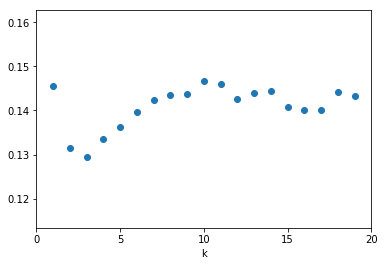

In [22]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X, y)
    scores.append(knn.score(X, y))
plt.figure()
plt.xlabel('k')
# plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])


Ahora lo que vamos a realizar es la prueba del algoritmo, estableciendo a Messi como nuestro juador buscado, y como podemos observar en nuestro resultado obtenemos 'RF' que es.

In [34]:
#Overall, Wage
misVar = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM',
                   'RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB', 'GK']

overallMessi = df[df.Name == 'L. Messi'].Overall.iloc[0]
wageMessi = df[df.Name == 'L. Messi'].Wage.iloc[0]

#dataClass = clf.predict([[55,96]])
dataClass = clf.predict([[overallMessi, wageMessi]])
posicion = 0

for i in range(1, 27):
    if dataClass == i:
        posicion = misVar[i]

posicion

'RF'

Como dataClass es un array, debe de coger la posición 0.

In [35]:
int(dataClass[0])

6

In [36]:
filtro = df.Wage < df[df.Name == 'L. Messi'].Wage.iloc[0] + 50
filtro2 = df.Position == dataClass[0]

df[(filtro2 & filtro)]['Name'].iloc[0:5]

0          L. Messi
50       D. Mertens
528       D. Valeri
890     L. Podolski
1774       C. Ciano
Name: Name, dtype: object

Como podemos ver estos son los 5 jugadores mas parecidos a Messi en Wage y Overall

- 1 - L. Messi
- 2 - D. Mertens
- 3 - D. Valeri
- 4 - L. Podolski
- 5 - C. Ciano

Y estos serían los resultados del KNN, nos muestra los 5 jugadores con mayores semejanzas, teniendo en cuenta la variable Wage y Overall.

Ahora lo comprobaremos con un jugador que tiene una valoración muy inferior a Messi.

In [38]:
overallMCoco = df[df.Name == 'M. Coco'].Overall.iloc[0]
wageMCoco= df[df.Name == 'M. Coco'].Wage.iloc[0]

#dataClass = clf.predict([[55,96]])
dataClass = clf.predict([[overallMCoco, wageMCoco]])
posicion = 0

In [39]:
filtro = df.Wage < df[df.Name == 'M. Coco'].Wage.iloc[0] 
filtro2 = df.Position == dataClass[0]

df[(filtro2 & filtro)]['Name'].iloc[0:5]

288          Marlos
371       J. Corona
555    V. Tsygankov
558        Raphinha
602          Otávio
Name: Name, dtype: object

Como podemos observar los resultados cambian debido a que hemos aplicado un filtro para que los jugadores se filtren por jugador.

In [26]:
df[df.Position == dataClass[0]]['Name'].iloc[0:5]

0          L. Messi
50       D. Mertens
528       D. Valeri
890     L. Podolski
1774       C. Ciano
Name: Name, dtype: object

In [60]:
Image(url='http://i63.tinypic.com/29o3myr.jpg',width=500)

# Conclusiones

- Problema de negocio

Gracias a este trabajo se podrían ahorrar costes para los diferentes equipos, sobretodo para los equipos más modestos ya que ahorraríamos tiempo y dinero en la elección de sustitutos. 

Otra oportunidad de negocio que podríamos encontrar es la venta de los 10 mejores sustitutos para una posición de un jugador de FIFA Ultimate Team, por ejemplo.

- Lenguaje utilizado

El lenguaje utilizado ha sido Python 3, implementado con Spyder para la visualización, no nos hemos visto obligados a utilizar un lenguaje como Scala o Spark para el tratamiento de cantidades masivas de datos.

- Analisis Estadístico
A través del algoritmo Knn implementado en una aplicación de visualización hemos podido realizar una comparativa entre un jugador elegido por el usuario, y el top 10 de los jugadores semejantes en base a posición de campo, overall y salario. 
Y además podemos observar gracias a un gráfico de araña, el top 5 en función de sus 29 características siendo jugadores, en el caso de que la posición sea portero el gráfico de araña mostrará solamente 5 características.

- Comunicación de resultados y visualización

Por último, para la comunicación de resultados nos hemos valido de Dash, que es la apliación de visualización para Python, en ella se muestra una tabla del top 10 de jugadores más similares en función del jugador elegido por el usuario y el gráfico de Araña que muestra las 29 características más importantes de dichos jugadores.

Por tanto, hemos realizado esta visualización basandonos de Spyder para la buena comunicación de resultados.

https://dash-fifa-knn.herokuapp.com/

El código del mismo lo puede encontrar en el siguiente enlace.

https://github.com/AlvaroFerro/MachineLearning/tree/master/Dash-Python